# COIS3510 – Workshop 4  
## Visualizing Text with Word Clouds (Python)

**Name:** Dikshith Reddy Macherla  
**Student ID:** 0789055  
**Course:** COIS3510 – Data Visualization  
**Workshop:** 4 – Visualizing Text  
**Text:** *The Tragedy of Romeo and Juliet* by William Shakespeare

---

### Objective

In this workshop, I explore basic **text visualization** techniques using **word clouds**.

In [2]:
# imports
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Make plots look a bit nicer
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["figure.dpi"] = 120

# Load the Romeo and Juliet text file
file_path = "SHAKESPEARE - Romeo and Juliet.txt"

with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
    text = f.read()

# Quick sanity checks
print("Number of characters in text:", len(text))
print("\nFirst 800 characters:\n")
print(text[:800])

Number of characters in text: 144398

First 800 characters:

THE TRAGEDY OF ROMEO AND JULIET

by William Shakespeare




Contents

THE PROLOGUE.

ACT I
Scene I. A public place.
Scene II. A Street.
Scene III. Room in Capuletâ€™s House.
Scene IV. A Street.
Scene V. A Hall in Capuletâ€™s House.

ACT II
CHORUS.
Scene I. An open place adjoining Capuletâ€™s Garden.
Scene II. Capuletâ€™s Garden.
Scene III. Friar Lawrenceâ€™s Cell.
Scene IV. A Street.
Scene V. Capuletâ€™s Garden.
Scene VI. Friar Lawrenceâ€™s Cell.

ACT III
Scene I. A public Place.
Scene II. A Room in Capuletâ€™s House.
Scene III. Friar Lawrenceâ€™s cell.
Scene IV. A Room in Capuletâ€™s House.
Scene V. An open Gallery to Julietâ€™s Chamber, overlooking the Garden.

ACT IV
Scene I. Friar Lawrenceâ€™s Cell.
Scene II. Hall in Capuletâ€™s House.
Scene III. Julietâ€™s Chamber.
Scene IV. Hall in C


## Figure 1 – Basic Word Cloud (uncleaned text)

The first visualization shows a **raw word cloud** generated directly from
the full *Romeo and Juliet* text without any cleaning or preprocessing.

This quick look helps identify the most frequent words before removing
common stopwords or punctuation.  
Because the text includes character names and stage directions,
we expect words like **“Romeo,” “Juliet,” “Capulet,”** and **“Scene”**
to dominate the cloud.

Parameters:
- `max_words = 200` – limit total words displayed.  
- `background_color = 'white'` – for readability.  
- `colormap = 'Dark2'` – ColourBrewer palette for variety .


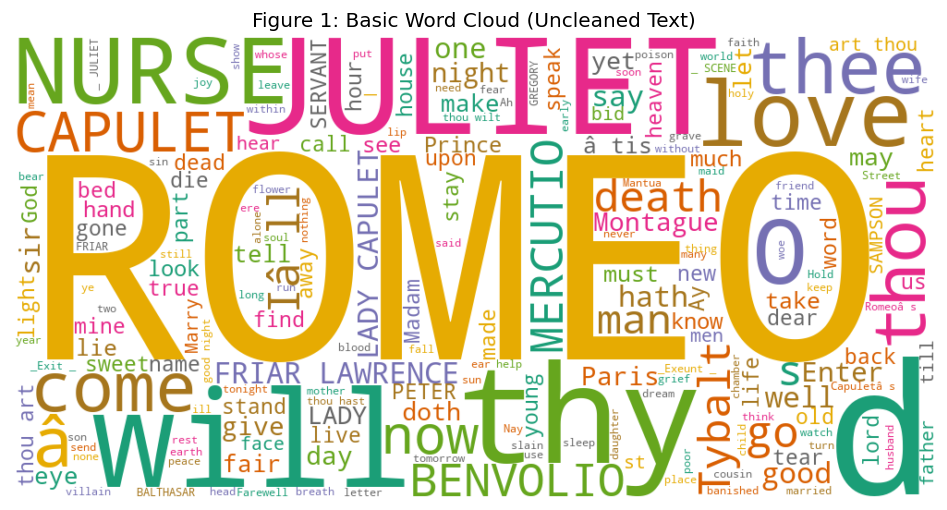

In [3]:
# Basic word cloud generation from raw text

raw_wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    max_words=200,
    colormap="Dark2"
).generate(text)

# Display the word cloud
plt.imshow(raw_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Figure 1: Basic Word Cloud (Uncleaned Text)")
plt.show()

## Text Cleaning and Preprocessing

Before generating a more meaningful word cloud, the text needs to be cleaned
to remove noise such as punctuation, numbers, and inconsistent casing.

The following steps are applied:
1. Convert all text to **lowercase**.  
2. Remove **punctuation** and **numbers** using regular expressions.  
3. Strip extra whitespace.  

This process reduces redundant variants (e.g., “Love” vs. “love”) and makes
the frequency distribution more reliable.

In [4]:
import re

# Step 1: Lowercase all text
clean_text = text.lower()

# Step 2: Remove punctuation and numbers using regex
clean_text = re.sub(r"[^a-z\s]", "", clean_text)

# Step 3: Remove extra whitespace
clean_text = re.sub(r"\s+", " ", clean_text).strip()

# Show a preview of cleaned text
print("Length of cleaned text:", len(clean_text))
print("\nFirst 500 characters:\n")
print(clean_text[:500])

Length of cleaned text: 133202

First 500 characters:

the tragedy of romeo and juliet by william shakespeare contents the prologue act i scene i a public place scene ii a street scene iii room in capulets house scene iv a street scene v a hall in capulets house act ii chorus scene i an open place adjoining capulets garden scene ii capulets garden scene iii friar lawrences cell scene iv a street scene v capulets garden scene vi friar lawrences cell act iii scene i a public place scene ii a room in capulets house scene iii friar lawrences cell scene 


## Figure 2 – Word Cloud from Cleaned Text (no stopwords removed)

After basic cleaning (lowercasing and removing punctuation and numbers),  
I regenerate the word cloud using the cleaned text.

Compared to Figure 1, **Figure 2** should:

- Reduce duplicate forms like “Love” vs “love”.
- Still include very common words such as *the*, *and*, *of*, etc.,
  because stopwords have **not yet** been removed.

This provides a useful intermediate step before applying stopword filtering.

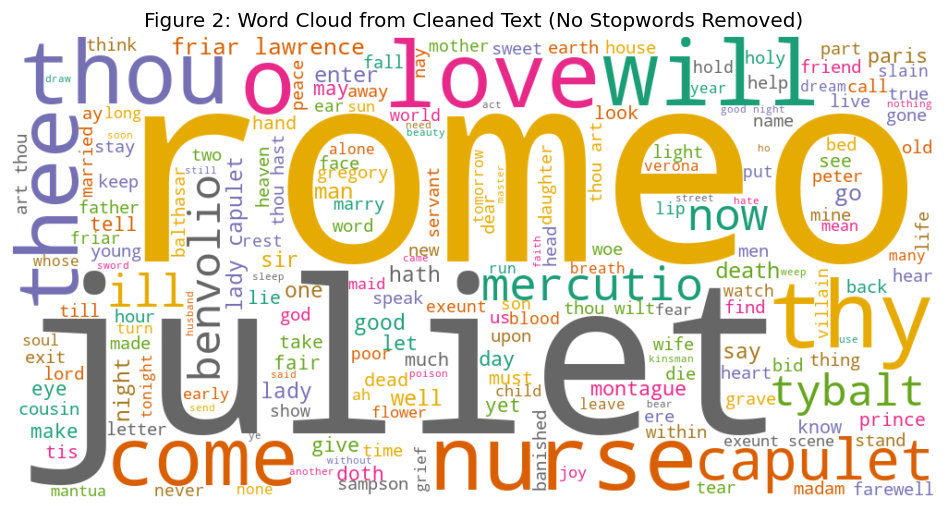

In [5]:
clean_wc = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    max_words=200,
    colormap="Dark2"
).generate(clean_text)

plt.imshow(clean_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Figure 2: Word Cloud from Cleaned Text (No Stopwords Removed)")
plt.show()

## Figure 3 – Word Cloud after Removing Stopwords

To improve the clarity of the cloud, we now remove:
1. Common English stopwords (e.g. *the, and, of, to, for, in*).  
2. Archaic Shakespearean words that dominate the text but don’t add meaning to themes (e.g. *thou, thy, thee, hath, therefore*).   

This leaves behind words more representative of character names, actions, and emotions, such as *love, death, night, heart, capulet,* and *friar.*

We will use `nltk.corpus.stopwords` and extend the list with custom archaic terms for better results.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


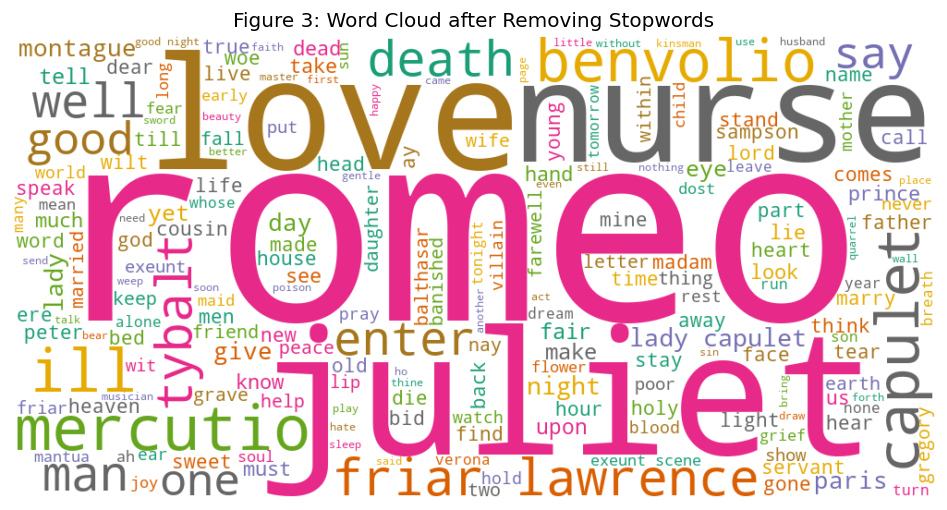

In [7]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already present
nltk.download("stopwords")

# Load standard English stopwords
stop_words = set(stopwords.words("english"))

# Add Shakespearean / custom stopwords
extra_stopwords = {
    "thou", "thy", "thee", "hath", "doth", "art",
    "shall", "tis", "thyself", "ye", "therefore", "hast",
    "would", "could", "may", "let", "come", "go", "sir", "exit"
}
stop_words.update(extra_stopwords)

# Tokenize and filter words
tokens = [word for word in clean_text.split() if word not in stop_words]

# Join back into a single string
filtered_text = " ".join(tokens)

# Generate the word cloud
wc_no_stop = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    max_words=200,
    colormap="Dark2"
).generate(filtered_text)

# Plot the word cloud
plt.imshow(wc_no_stop, interpolation="bilinear")
plt.axis("off")
plt.title("Figure 3: Word Cloud after Removing Stopwords")
plt.show()

## Figure 4 – Word Cloud from Word Frequencies (Document–Term Matrix)

So far, the word clouds have been generated directly from a cleaned text string.
In this step, I use a more explicit **document–term matrix** style approach:

1. Use `CountVectorizer` (from scikit-learn) to:
   - tokenize the text,
   - remove stopwords,
   - count the frequency of each remaining word.
2. Convert the result into a **word → frequency** dictionary.
3. Pass this dictionary to `WordCloud.generate_from_frequencies()`.

**Figure 4** should look similar to Figure 3, but this method makes the word
frequencies explicit and would scale more easily to multiple documents.

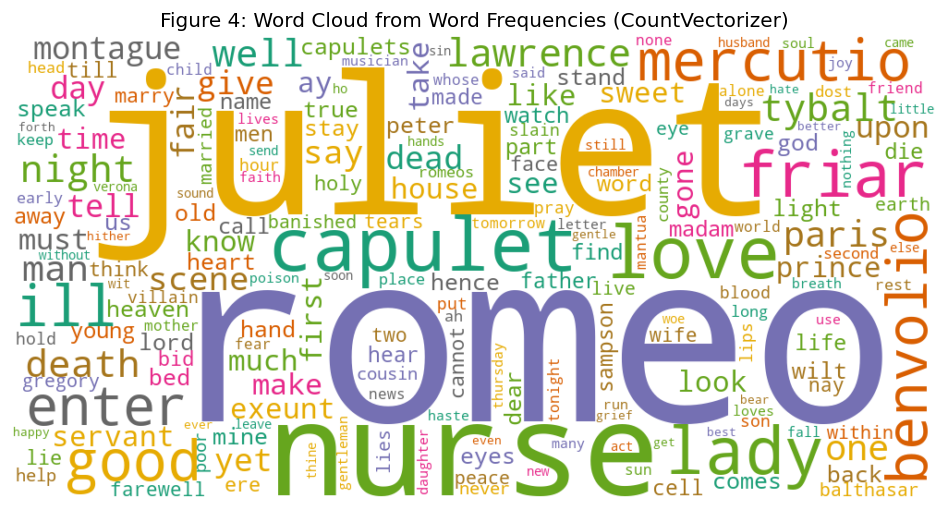

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the stopwords set to a list for CountVectorizer
vectorizer = CountVectorizer(stop_words=list(stop_words))

# Fit on the cleaned text (single document)
X = vectorizer.fit_transform([clean_text])

# Get vocabulary and counts
words = vectorizer.get_feature_names_out()
counts = X.toarray().flatten()

# Build a word: frequency dictionary
freq_dict = dict(zip(words, counts))

# Generate a word cloud from frequencies
wc_freq = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    max_words=200,
    colormap="Dark2"
).generate_from_frequencies(freq_dict)

plt.imshow(wc_freq, interpolation="bilinear")
plt.axis("off")
plt.title("Figure 4: Word Cloud from Word Frequencies (CountVectorizer)")
plt.show()

## Figure 5 – Word Cloud after Removing Dominant Names

In Figures 3 and 4, a few very frequent tokens (**“romeo”, “juliet”, “love”,
“nurse”, “capulet”**) dominate the cloud.  
To uncover additional patterns, I remove these dominant words and regenerate
the word cloud.

The goal of **Figure 5** is to highlight:

- Other important **characters** (e.g. *benvolio, tybalt, mercutio, paris*),
- Additional **themes and emotions** (e.g. *death, night, grief, hate, peace*).

This is useful when exploring a long text where a few names otherwise hide
subtler patterns.

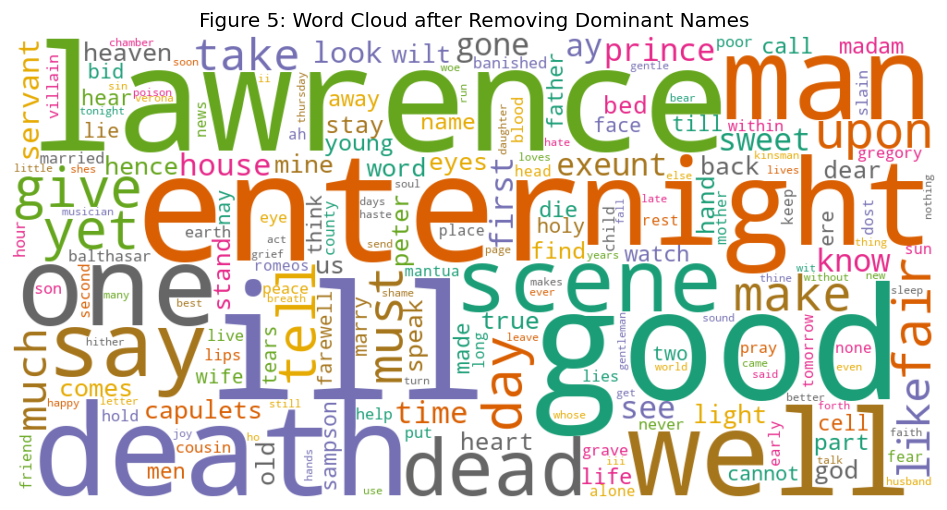

In [10]:
# List of dominant words to remove
dominant_words = {
    "romeo", "juliet", "love", "nurse", "capulet",
    "benvolio", "mercutio", "friar", "paris", "tybalt",
    "montague", "lady", "lord"
}

# Filter the frequency dictionary
reduced_freq_dict = {
    word: count
    for word, count in freq_dict.items()
    if word not in dominant_words
}

# Generate word cloud from the reduced frequencies
wc_reduced = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    max_words=200,
    colormap="Dark2"
).generate_from_frequencies(reduced_freq_dict)

plt.imshow(wc_reduced, interpolation="bilinear")
plt.axis("off")
plt.title("Figure 5: Word Cloud after Removing Dominant Names")
plt.show()

## Figure 6 – Stylized Word Cloud

To conclude, I create a **stylized** version of the filtered word cloud.
This uses additional layout and color parameters to improve visual appeal while
keeping analytical clarity.  
This figure highlights recurring thematic words such as *death, night, good,
fair, heaven,* and *light*, giving a more artistic overview of the play’s tone.

Customizations include:
- `max_words=250` for richer vocabulary coverage,  
- `prefer_horizontal=0.7` for more natural text distribution,  
- alternative color map (e.g. `"Spectral"`),  
- slightly larger image dimensions for report readability.


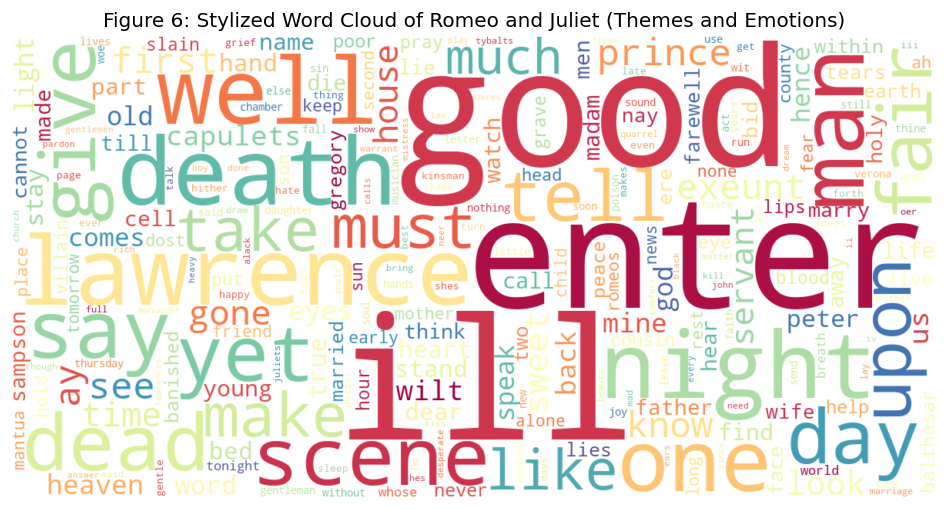

In [11]:
# Stylized final version
wc_final = WordCloud(
    width=1200,
    height=600,
    background_color="white",
    max_words=250,
    prefer_horizontal=0.7,
    colormap="Spectral",
    font_step=1,
    random_state=42
).generate_from_frequencies(reduced_freq_dict)

plt.imshow(wc_final, interpolation="bilinear")
plt.axis("off")
plt.title("Figure 6: Stylized Word Cloud of Romeo and Juliet (Themes and Emotions)")
plt.show()

## Discussion of Patterns and Relationships

In this workshop, I explored textual patterns in *Romeo and Juliet* using a
series of progressively refined **word clouds** (Figures 1–6).  
Each stage revealed different aspects of the text’s linguistic and thematic
structure.

### General lexical patterns (Figures 1–2)

- The early word clouds show that **Romeo** and **Juliet** dominate the text,
  confirming their centrality.
- Frequent use of words like *love*, *death*, *night*, and *heaven* hints at the
  play’s central oppositions - passion versus tragedy, light versus darkness.
- The presence of stage directions (*enter*, *scene*, *exit*) reminds us that
  this is a **dramatic script**, not purely narrative prose.

### Effect of text cleaning (Figures 2–3)

- After removing punctuation and standardizing case, readability improves, and
  functional terms (*thee*, *thou*, *shall*) become clearer.
- Eliminating stopwords helps expose **content words** that carry emotional and
  dramatic meaning: *love*, *death*, *night*, *good*, *fair*, *light*.

### Word frequency and thematic emphasis (Figure 4)

- The CountVectorizer-based word cloud emphasizes frequency more precisely.
  Character names (*Romeo*, *Juliet*, *Nurse*, *Capulet*) dominate, consistent
  with their speaking volume and importance.
- Secondary words such as *well*, *good*, *night*, and *death* indicate
  recurrent motifs beyond simple character focus.

### Revealing hidden structure (Figure 5)

- Removing the dominant names highlights **secondary agents** and **emotional
  vocabulary**, such as *man*, *lawrence*, *heaven*, *enter*, *dead*, and *light*.
- This suggests underlying themes of **fate**, **religion**, and **life/death
  transition** that persist across scenes even when major characters are absent.

### Stylized synthesis (Figure 6)

- The final stylized word cloud balances artistic presentation with analytical
  clarity.
- It emphasizes recurring words (*good*, *enter*, *night*, *death*, *fair*),
  symbolizing the tonal rhythm of the play - oscillating between hope and doom.


## Conclusion

Through this workshop, I demonstrated how **text-mining and visualization**
methods can reveal hidden layers of meaning in literary works.

- Early figures showed how unprocessed text is dominated by character names and
  stage directions.
- Successive cleaning and filtering steps exposed the **emotional and thematic
  core** of the play.
- Removing common stopwords and major names uncovered recurring motifs such as
  *death, night, heaven, light,* and *good*, which mirror the tragic structure
  of *Romeo and Juliet*.

The final word clouds collectively illustrate how computational text analysis
can complement literary interpretation, translating Shakespeare’s poetic
language into **quantitative visual patterns** that reinforce its enduring
themes of **love, fate, and mortality**.